In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import math
import seaborn as sn
from scipy.stats import pearsonr

In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
df = pd.read_csv("BTP Data-001/BTP Data/Process_Rainfall_Data/22Thrissur-Thalipilly_processed.csv")

In [3]:
df

,Date,RF
0,1970-01-01,0.0
1,1970-01-02,0.0
2,1970-01-03,0.0
3,1970-01-04,0.0
4,1970-01-05,0.0
...,...,...
2426,1987-10-27,13.1
2427,1987-10-28,12.0
2428,1987-10-29,1.4
2429,1987-10-30,46.0


In [4]:
df = df.replace(-1.0,np.nan)

In [5]:
df

,Date,RF
0,1970-01-01,0.0
1,1970-01-02,0.0
2,1970-01-03,0.0
3,1970-01-04,0.0
4,1970-01-05,0.0
...,...,...
2426,1987-10-27,13.1
2427,1987-10-28,12.0
2428,1987-10-29,1.4
2429,1987-10-30,46.0


In [6]:
df = df.assign(RF=df.RF.interpolate(method='linear',limit_direction='both'))

In [7]:
df

,Date,RF
0,1970-01-01,0.0
1,1970-01-02,0.0
2,1970-01-03,0.0
3,1970-01-04,0.0
4,1970-01-05,0.0
...,...,...
2426,1987-10-27,13.1
2427,1987-10-28,12.0
2428,1987-10-29,1.4
2429,1987-10-30,46.0


In [8]:
df.isna().sum()

Date    0
RF      0
dtype: int64

In [9]:
tot_RF = []
latency = 7
dt = []
week = []
for i in range(0,len(df)-latency,latency):
    tot_RF.append(np.sum(df['RF'][i:i+latency]))
    dd = str(df['Date'][i])+ "~" + str(df['Date'][i+latency])
    dt.append(dd)

In [10]:
len(dt)

347

In [11]:
data = tot_RF
U = [min(data) , max(data)]

In [12]:
DATA = (data-U[0])/(U[1] - U[0])
Data = (np.array(DATA))
Data = np.reshape(Data , (Data.shape[0],1))

slt1 = int(0.70*len(data))
slt2 = int(0.80*len(data))
Train = Data[:slt1]
Val = Data[slt1:slt2]
Test = Data[slt1:]
DT = dt[slt1:]

In [13]:
x_axis = [i+1 for i in range(len(data))]
x_tr = x_axis[:slt1]
x_val = x_axis[slt1:slt2]
x_tst = x_axis[slt2:]
al = (U[1] - U[0]) + U[0]

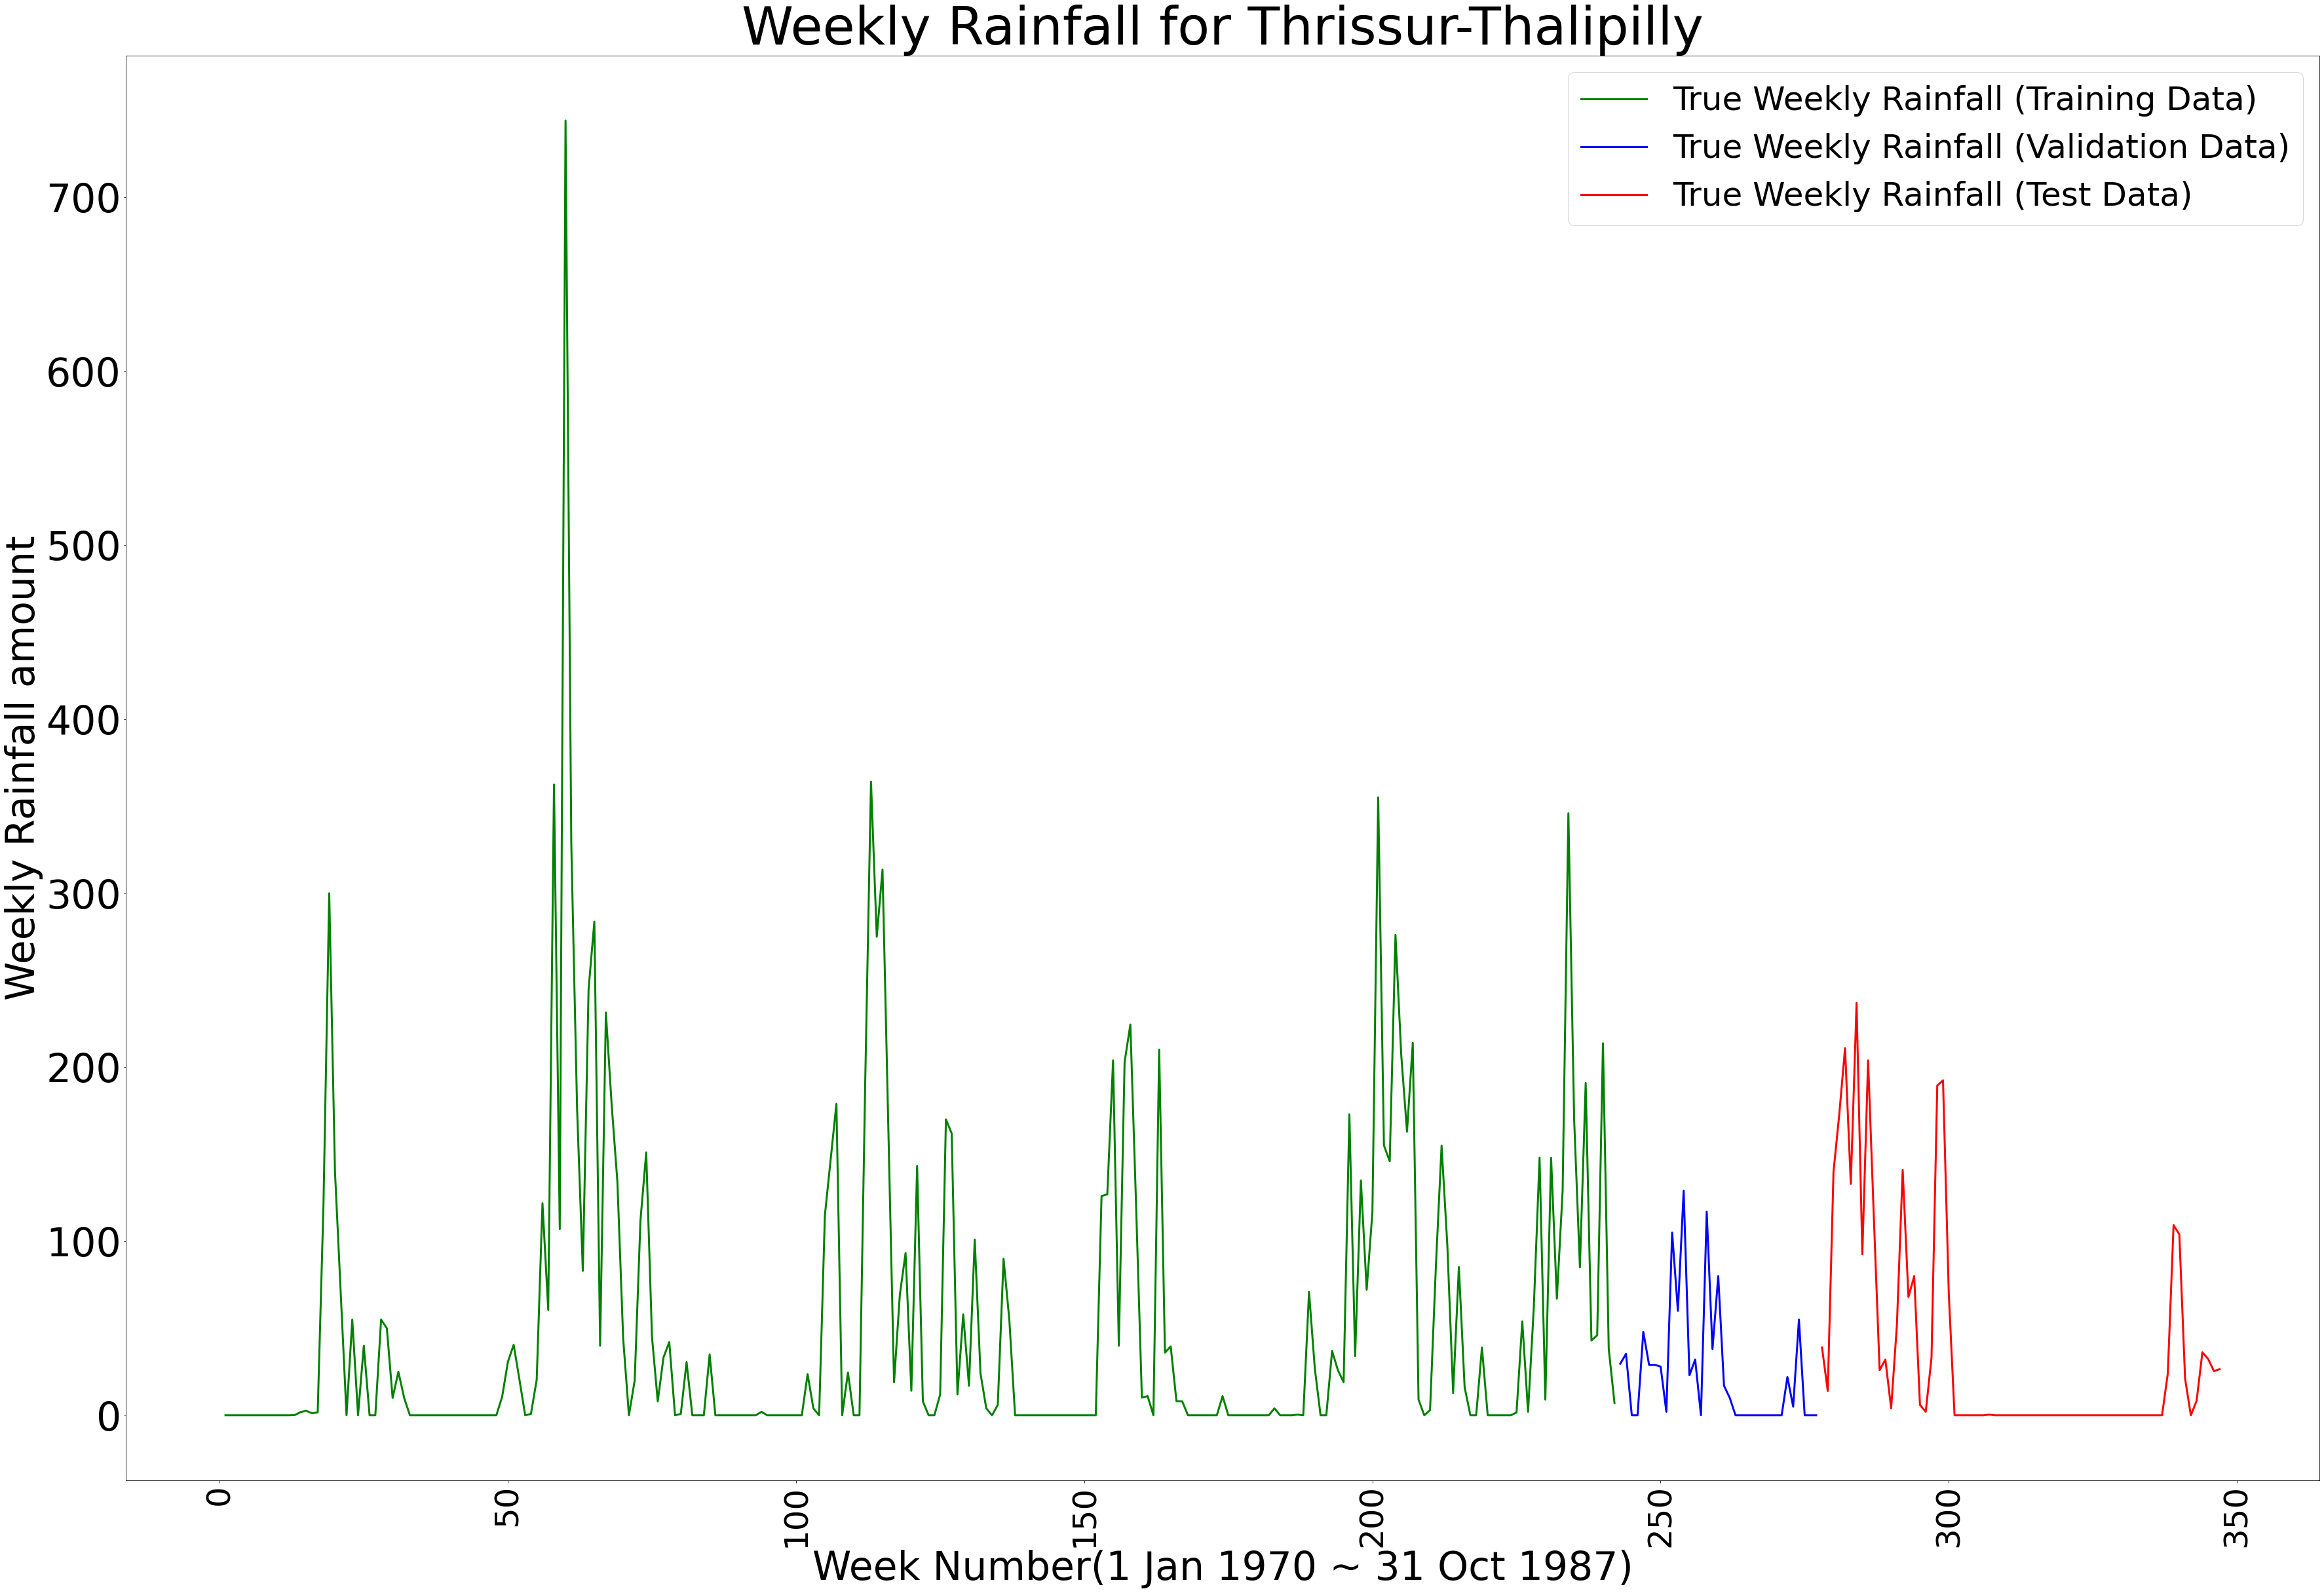

In [16]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
plt.title('Weekly Rainfall for Thrissur-Thalipilly', fontsize = 80)
plt.xticks(fontsize=50, rotation=90)
plt.yticks(fontsize=60, rotation=0)
#plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Week Number(1 Jan 1970 ~ 31 Oct 1987)',fontsize=60)
plt.plot(x_tr, Train*al, 'g',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Training Data)')
plt.plot(x_val, Val*al, 'b',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Validation Data)')
plt.plot(x_tst, Data[slt2:]*al, 'r',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Test Data)')
plt.legend(loc='best',prop={'size': 50})

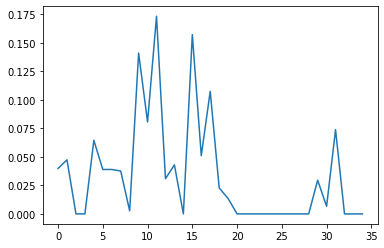

In [15]:
plt.plot(Val)

In [28]:
import GMM_K

numStates = 3
numMixtureComp = 2
dimension = 1
numIterations = 200
threshold = 0.0
covariance_type = 'full'
verbose = True


model = GMM_K.GmmHmmLikelihoodSimilarity_K(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold,
    covariance_type=covariance_type,
    verbose = True
)

In [29]:
logValues = model.train([Train])

         1          67.2533             +nan
         2         257.6465        +190.3932
         3         336.1437         +78.4972
         4         399.5836         +63.4399
         5         443.5897         +44.0061
         6         494.2770         +50.6873
         7         542.0252         +47.7482
         8         575.5686         +33.5433
         9         626.7021         +51.1335
        10         676.5167         +49.8146
        11         718.8984         +42.3817
        12         778.9456         +60.0472
        13         859.8224         +80.8768
        14         980.9965        +121.1741
        15        1101.6534        +120.6569
        16        1348.0220        +246.3687
        17        5824.9484       +4476.9264
        18         782.1072       -5042.8411
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of st

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

Has model converged:  True


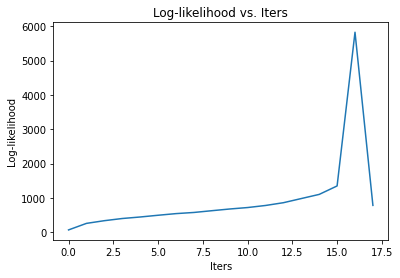

In [30]:
plt.plot(logValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
print('Has model converged: ', model.model.monitor_.converged)

In [37]:
K = len(Train)
rmse = []
MAE = []
CC = []
for k in range(1,K):
    pred = model.predict(Val,k)
    p2 = pred*(U[1] - U[0]) + U[0]
    T1 = Val*(U[1] - U[0]) + U[0]
    rmse.append(mean_squared_error(p2, T1, squared=False))
    MAE.append(mae(T1,p2))
    d1 = np.array(T1)
    d1 = np.reshape(d1 , d1.shape[0])
    d2 = np.array(p2)
    d2 = np.reshape(d2 , d2.shape[0])
    corr, _ = pearsonr(d1, d2)
    CC.append(corr)
    print(k)

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

1
2
3


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

4
5
6


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

7
8
9


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

10
11
12


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

13
14
15


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

16
17
18


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

19
20
21


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

22
23
24


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

25
26
27


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

28
29
30


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

31
32
33


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

34
35
36


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

37
38
39


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

40
41
42


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

43
44
45


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

46
47
48


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

49
50
51


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

52
53
54


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

55
56
57


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

58
59
60


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

61
62
63


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

64
65
66


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

67
68
69


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

70
71
72


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

73
74
75


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

76
77
78


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

79
80
81


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

82
83
84


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

85
86
87


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

88
89
90


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

91
92
93


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

94
95
96


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

97
98
99


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

100
101
102


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

103
104
105


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

106
107
108


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

109
110
111


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

112
113
114


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

115
116
117


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

118
119
120


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

121
122
123


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

124
125
126


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

127
128
129


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

130
131
132


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

133
134
135


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

136
137


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

138
139
140


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

141
142
143


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

144
145
146


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

147
148
149


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

150
151
152


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

153
154
155


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

156
157
158


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

159
160
161


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

162
163
164


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

165
166
167


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

168
169
170


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

171
172
173


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

174
175
176


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

177
178
179


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

180
181
182


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

183
184
185


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

186
187
188


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

189
190


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

191
192
193


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

194
195
196


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

197
198
199


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

200
201
202


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

203
204
205


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

206
207
208


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

209
210
211


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

212
213
214


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

215
216
217


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

218
219
220


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

221
222
223


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

224
225
226


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

227
228
229


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

230
231
232


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

233
234
235


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

236
237
238


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

239
240


Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.


241


In [479]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (50,10))
# ax1.set_xlim(1, K)
# ax1.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax1.set_ylabel('RMSE', fontweight ='bold', fontsize = 30)
# ax1.grid(True)
# ax1.set_title('RMSE vs K', fontsize = 30, fontweight ='bold')
# ax1.plot(rmse, linewidth='5')
# ax1.tick_params(axis='both', which='major', labelsize=30)


# ax2.set_xlim(1, K)
# ax2.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax2.set_ylabel('MAE', fontweight ='bold', fontsize = 30)
# ax2.grid(True)
# ax2.set_title('MAE vs K', fontsize = 30, fontweight ='bold')
# ax2.plot(MAE, linewidth='5')
# ax2.tick_params(axis='both', which='major', labelsize=30)

# ax3.set_xlim(1, K)
# ax3.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax3.set_ylabel('CC', fontweight ='bold', fontsize = 30)
# ax3.grid(True)
# ax3.set_title('CC vs K', fontsize = 30, fontweight ='bold')
# ax3.plot(CC, linewidth='5')
# ax3.tick_params(axis='both', which='major', labelsize=30)


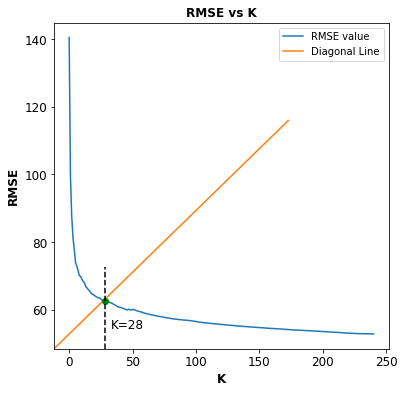

In [44]:
th = 28
st = 'K='+str(th)
f, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('K', fontweight ='bold', fontsize = 12)
ax.set_ylabel('RMSE', fontweight ='bold', fontsize = 12)
ax.set_title('RMSE vs K', fontsize = 12, fontweight ='bold')
ax.plot(rmse, '-' , label = 'RMSE value')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot([0, 0.7], [0, 0.7], transform=ax.transAxes, label = 'Diagonal Line')
ax.plot(th, rmse[th-1], 'go')
ax.axvline(x=th , ymax = 0.25,ls='--',c='black')
ax.text(th+5, rmse[th-1]-8, st, fontsize=12)
ax.legend()

In [31]:
pred = model.predict(Test,len(Train))
p2 = pred*(U[1] - U[0]) + U[0]
T1 = Test*(U[1] - U[0]) + U[0]

Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of state #2, mixture #1 has a null eigenvalue.
Covariance of 

In [32]:
len(DT)

105

In [33]:
xaxis = [DT[i] for i in range(0,len(DT),10)]
ticks = [i+1 for i in range(0,len(DT),10)]

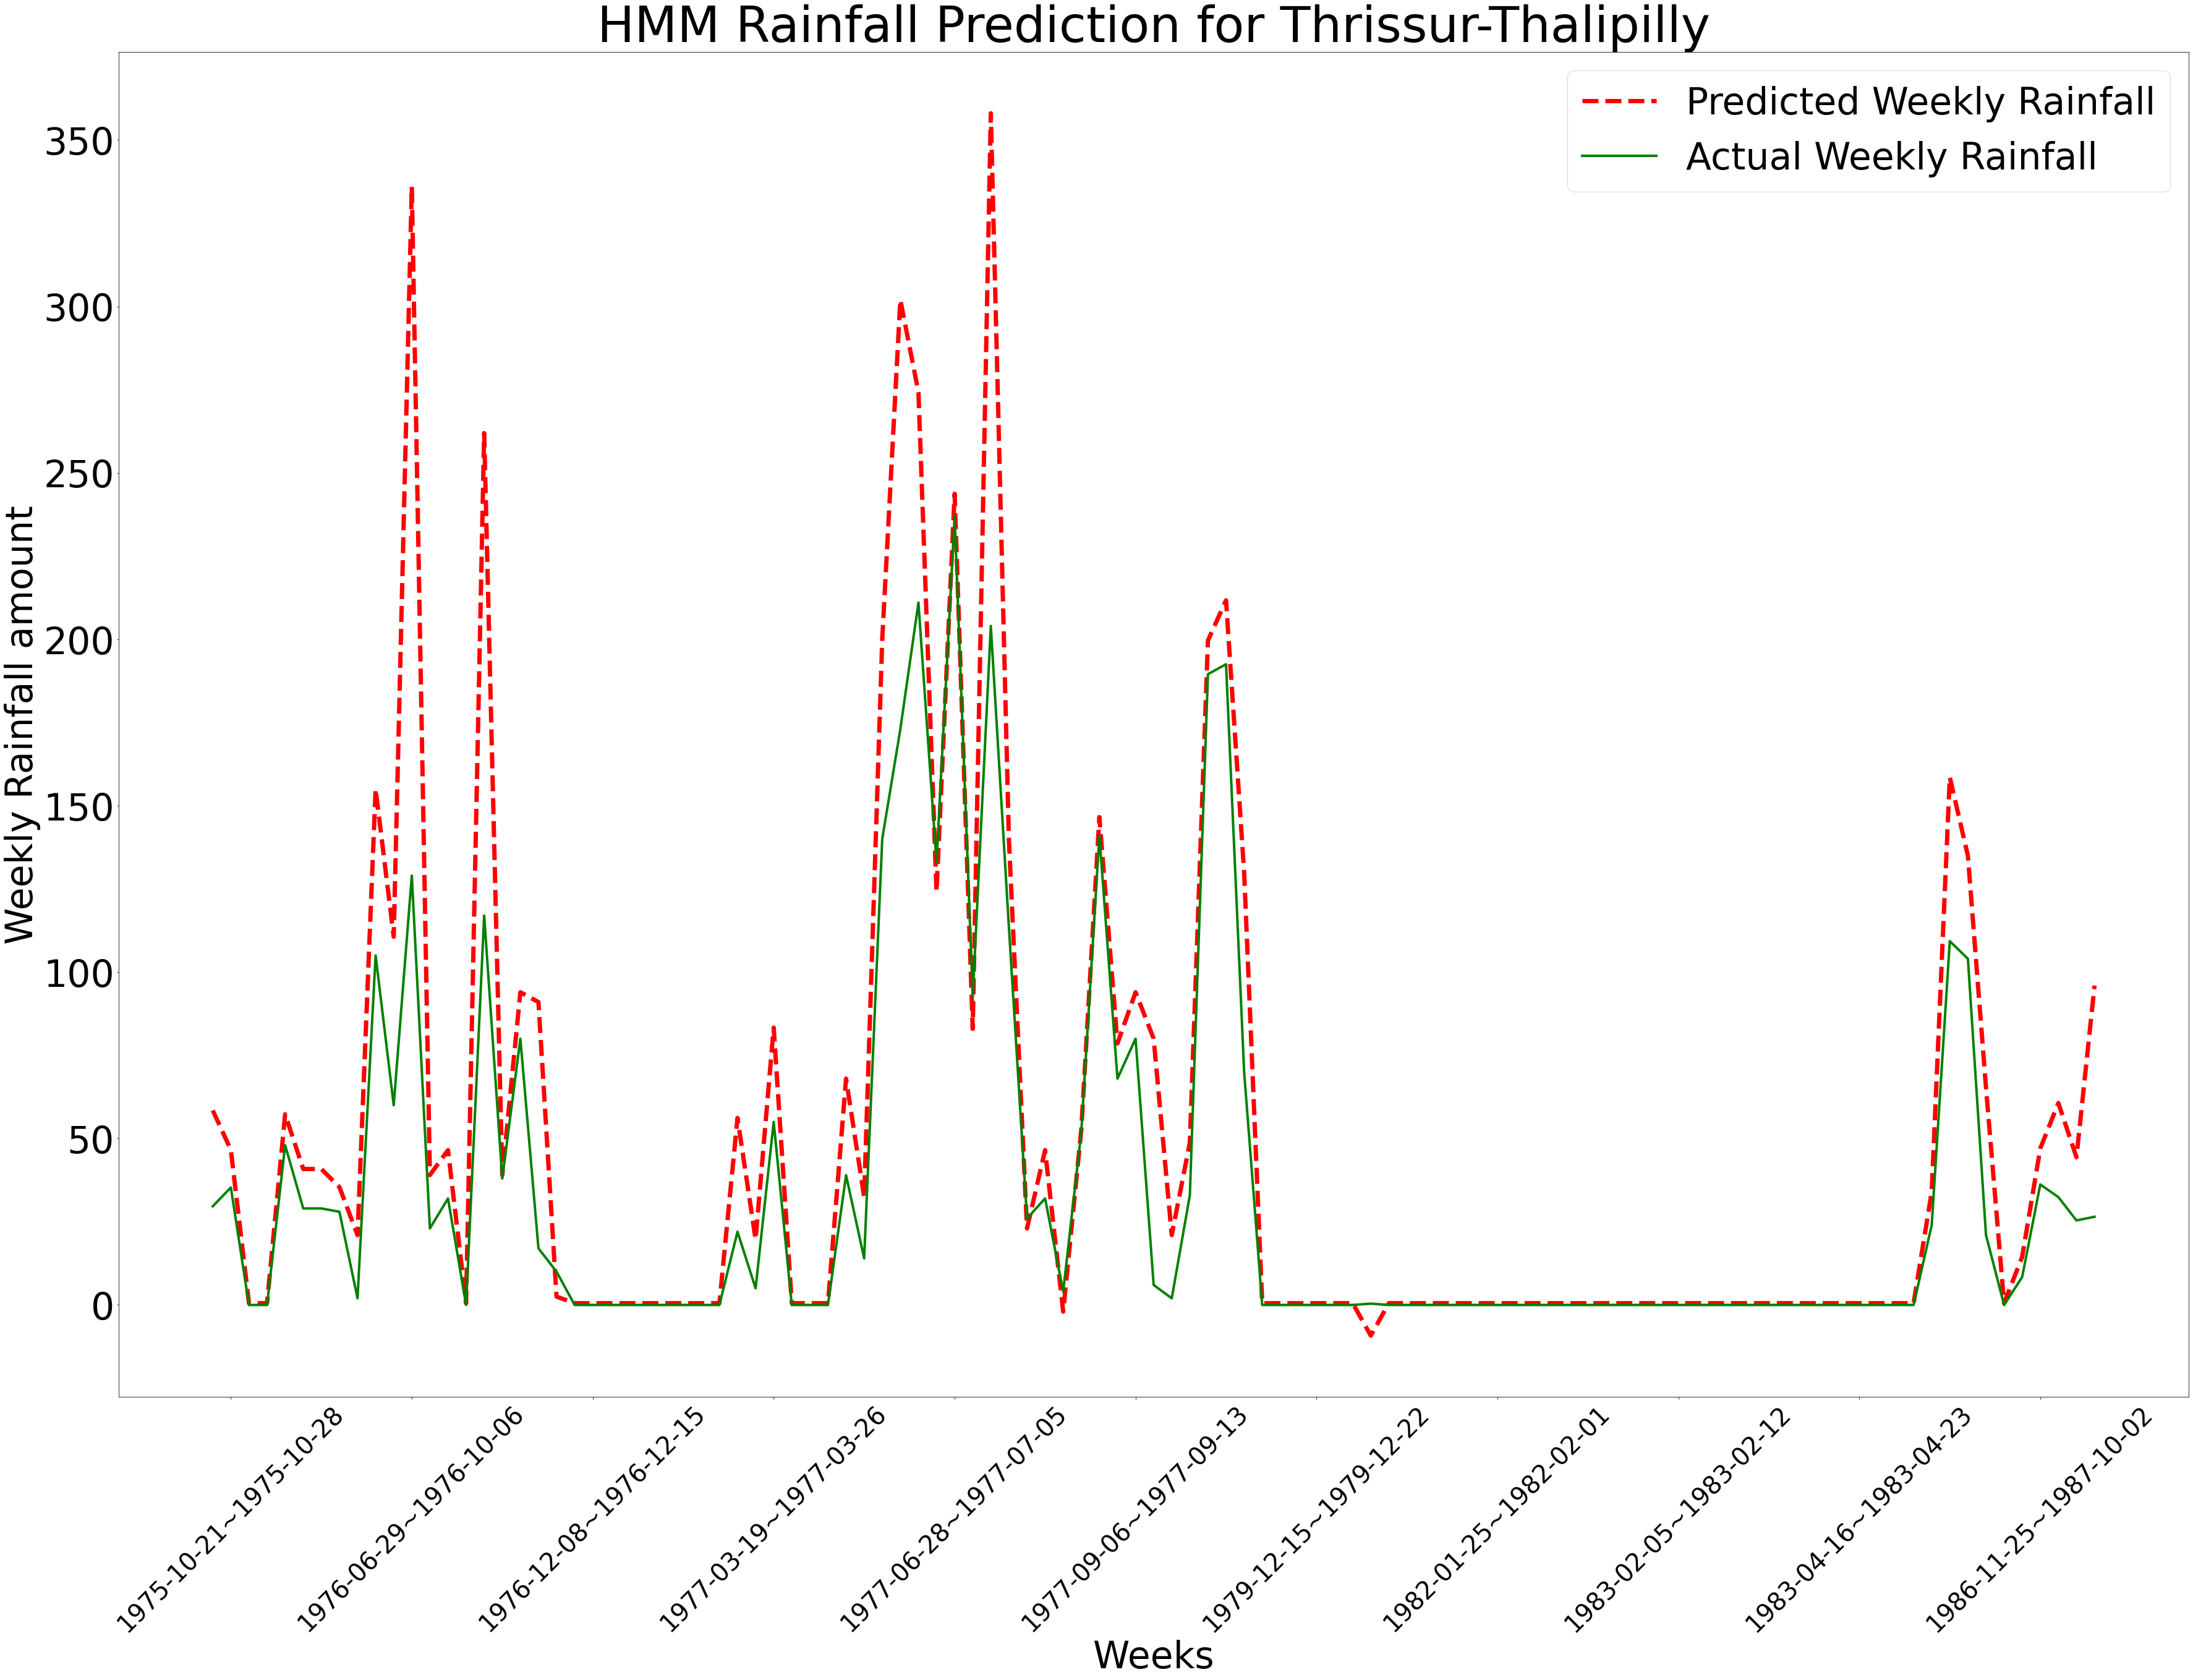

In [40]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
#plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('HMM Rainfall Prediction for Thrissur-Thalipilly', fontsize = 80)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=60, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Weeks',fontsize=60)
plt.plot(p2-10, 'r', linestyle='--', linewidth='7', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='4', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 60})

In [42]:
mean_squared_error(T1, p2-10, squared=False)

37.987862702742824

In [43]:
mae(T1,p2-10)

17.32639760723494

In [44]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])

corr, _ = pearsonr(d1, d2)
corr

0.9324397547422227